In [1]:
print("Hello World!")

Hello World!


In [2]:
import os 

In [3]:
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
import igraph_testing as ig

In [4]:
def find_coords(filename):
    with open(filename, "r") as file:
        header = file.readline().split(' ')
        dimX, dimY = int(header[0]), int(header[1])
        if len(header) < 3:
            dimZ = 1
        else:
            if int(header[2]) == 0:
                dimZ = 1
            else:
                dimZ = int(header[2])

        if dimZ > 1:
            # dimZ = dimX * dimY
            is_2d = False
        coords = [dimX, dimY, dimZ]
    return coords

In [5]:
def filterGraph(graph):
    keptEdges = [edge for edge in graph.get_edgelist()
                 if graph.vs[edge[0]]['color'] == graph.vs[edge[1]]['color']
                 or 'red' in {graph.vs[edge[0]]['color'], graph.vs[edge[1]]['color']}
                 or 'blue' in {graph.vs[edge[0]]['color'], graph.vs[edge[1]]['color']}]

    return graph.subgraph_edges(keptEdges, delete_vertices=False)


In [6]:
def find_tortuosity(g, is_2d, filename):
    numVertices = g.vcount()
    redVertex = g.vcount() - 2
    blackToRedList = []
    filteredGraph = filterGraph(g)
    idOfPixelIn1DArray, tort = read_file_and_extract_numbers(filename)

    #Calculate vertex frequencies
    vertex_frequency = [0] * numVertices
    for i in range(len(idOfPixelIn1DArray)):
        vertex_frequency[idOfPixelIn1DArray[i]] = tort[i]

    vertex_frequency = vertex_frequency[:-3]
    dimX,dimY,dimZ = coords = find_coords(filename)
    data_2d = np.array(vertex_frequency).reshape(dimY, dimX)

    # Create the heatmap
    plt.imshow(data_2d, cmap='hot', interpolation='nearest')
    plt.colorbar()  
    plt.show()

In [7]:
def read_file_and_extract_numbers(base_filename):
    base_filename = base_filename[5:-4]
    file_path = f"distances/{base_filename}-IdTortuosityBlackToRed.txt"
    idOfPixelIn1DArray = []
    tort = []

    # Open the file in read mode
    with open(file_path, "r") as file:
        # Read each line in the file
        for line in file:
            # Split the line into a list of strings
            parts = line.split()
            first_number = int(parts[0])
            second_number = float(parts[1])
            idOfPixelIn1DArray.append(first_number)
            tort.append(second_number)

    return idOfPixelIn1DArray, tort

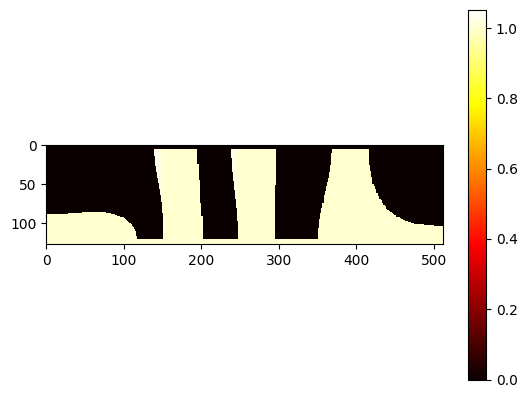

In [8]:
filename = "data/data_0.5_2.2_001900.txt"
(g, is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths,
     shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca)  = ig.generateGraphAdj(filename)
find_tortuosity(g, is_2D, filename)

In [ ]:
filename = "data/data_0.514_2.4_000220.txt"
(g, is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths,
     shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca)  = ig.generateGraphAdj(filename)
find_tortuosity(g, is_2D, filename)


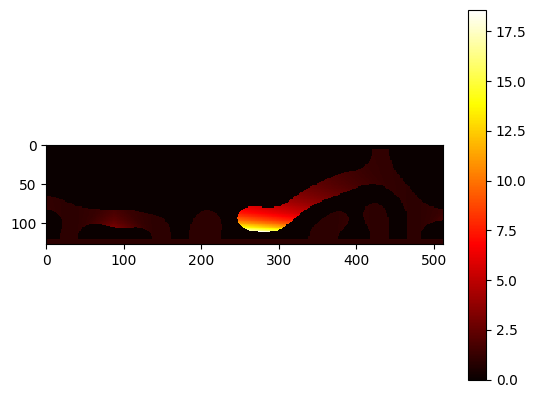

In [10]:
filename = "data/data_0.514_2.6_000080.txt"
(g, is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths,
     shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca)  = ig.generateGraphAdj(filename)
find_tortuosity(g, is_2D, filename)

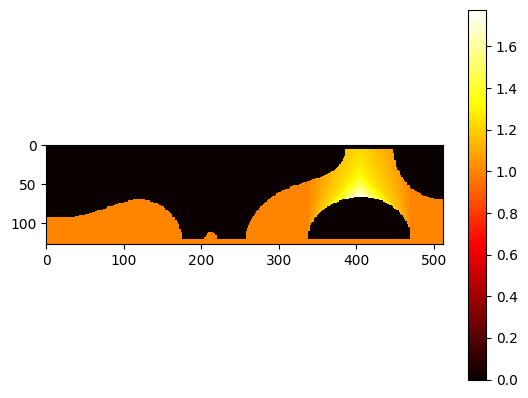

In [11]:
filename = "data/data_0.514_2.6_000980.txt"
(g, is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths,
     shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca)  = ig.generateGraphAdj(filename)
find_tortuosity(g, is_2D, filename)

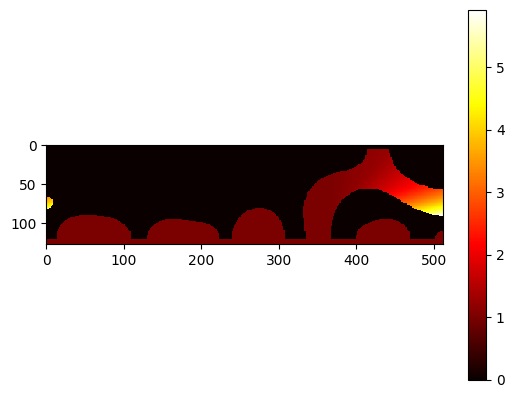

In [12]:
filename = "data/data_0.514_2.8_000200.txt"
(g, is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths,
     shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca)  = ig.generateGraphAdj(filename)
find_tortuosity(g, is_2D, filename)

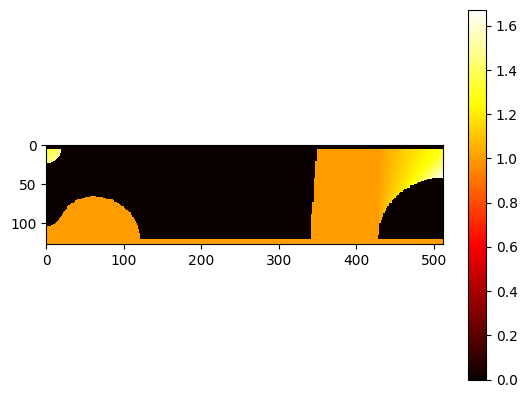

In [13]:
filename = "data/data_0.514_2.8_005540.txt"
(g, is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths,
     shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca)  = ig.generateGraphAdj(filename)
find_tortuosity(g, is_2D, filename)

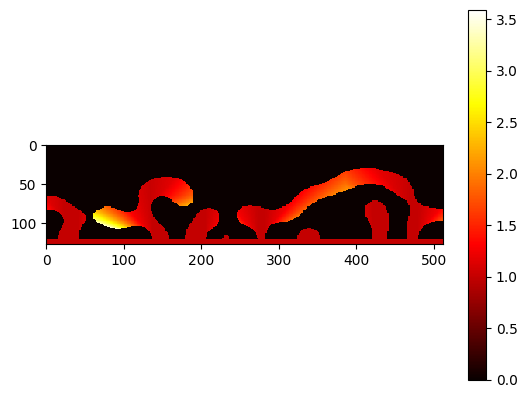

In [14]:
filename = "data/data_0.543_2.6_000060.txt"
(g, is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths,
     shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca)  = ig.generateGraphAdj(filename)
find_tortuosity(g, is_2D, filename)